# Installation

### Install `proteinsolver`

In [1]:
# !pip install git+https://gitlab.com/ostrokach/proteinsolver.git

# Imports

In [2]:
import pandas as pd
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import proteinsolver
import proteinsolver.datasets

In [4]:
%load_ext autoreload
%autoreload 2

# Dataset

## Train / test split

In [5]:
df = pd.read_csv("../proteinsolver/datasets/data/sudoku.zip")
df.head(2)

,quizzes,solutions
0,0043002090050090010700600430060020871900074000...,8643712593258497619712658434361925871986574322...
1,0401000501070039605200080000000000170009068008...,3461792581875239645296483719658324174729168358...


(array([0.00000e+00, 0.00000e+00, 0.00000e+00, 1.27190e+04, 9.17857e+05,
        6.93960e+04, 2.80000e+01, 0.00000e+00, 0.00000e+00, 0.00000e+00]),
 array([0.4 , 0.44, 0.48, 0.52, 0.56, 0.6 , 0.64, 0.68, 0.72, 0.76, 0.8 ]),
 <a list of 10 Patch objects>)

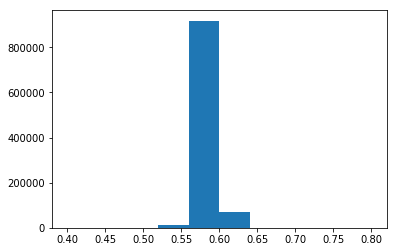

In [17]:
plt.hist([s.count("0") / 81 for s in df["quizzes"]], range=(0.4, 0.8))

In [6]:
df_shuffled = df.sample(frac=1, random_state=np.random.RandomState(42))
df_shuffled.head()

,quizzes,solutions
987231,0040000087002090060100804508000605000790040010...,6245137987852493169137864528329615475793248614...
79954,0169040070040300800030619205091408001700000000...,2169845379542376817835619245691438721726584933...
567130,0502090003007600020000410891040500700061725000...,8512394673497681526725413891248569739361725487...
500891,0630075005000060010804200900900402052046080001...,9631875245429368717814253968973412652546789131...
55399,0902001060045000071700800300050340188009503000...,5982731462345618971764895329256347188179523644...


In [7]:
mid = int(len(df_shuffled) * 0.7)

df_train = df_shuffled.iloc[:mid]
df_valid = df_shuffled.iloc[mid:]

assert len(df_train) + len(df_valid) == len(df_shuffled) == len(df)
assert not set(df_train.index) & set(df_valid.index)

In [8]:
df_train.to_csv("../proteinsolver/datasets/data/sudoku_train.csv.gz", index=False, compression="infer")
df_valid.to_csv("../proteinsolver/datasets/data/sudoku_valid.csv.gz", index=False, compression="infer")

## Make sure everythong works as expected

In [9]:
sudoku_dataset_train = proteinsolver.datasets.SudokuDataset("train")

In [10]:
sudoku_dataset_train[0]

Data(edge_index=[2, 1701], label=[1], x=[81, 1], y=[81, 1])

In [11]:
sudoku_dataset_valid = proteinsolver.datasets.SudokuDataset("valid")

In [12]:
sudoku_dataset_valid[0]

Data(edge_index=[2, 1701], label=[1], x=[81, 1], y=[81, 1])